In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
import pyaudio
p = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
RATE = 22050
CHUNK = 1024
CHANNELS = 1

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

RECORD_SECONDS = 5

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [26]:
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                output=True,
                frames_per_buffer=CHUNK)
for f in frames:
    stream.write(f)
stream.close()
p.terminate()

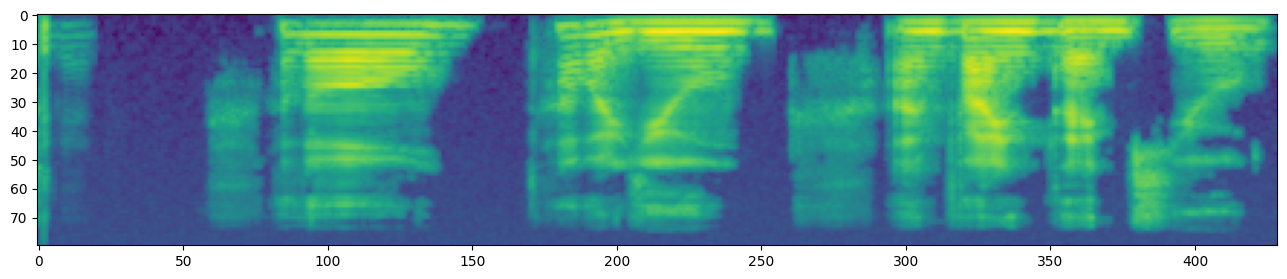

In [10]:
waveform = np.frombuffer(b''.join(frames), np.int16)/32768
import torchaudio
import torch
transform = torchaudio.transforms.MelSpectrogram(22050, n_fft=1024, win_length=1024, 
                                                 hop_length=256, n_mels=80)
mel_specgram = transform(torch.tensor(waveform[None].astype(np.float32)))
figsize(16, 16)
imshow(np.log10(mel_specgram[0]))

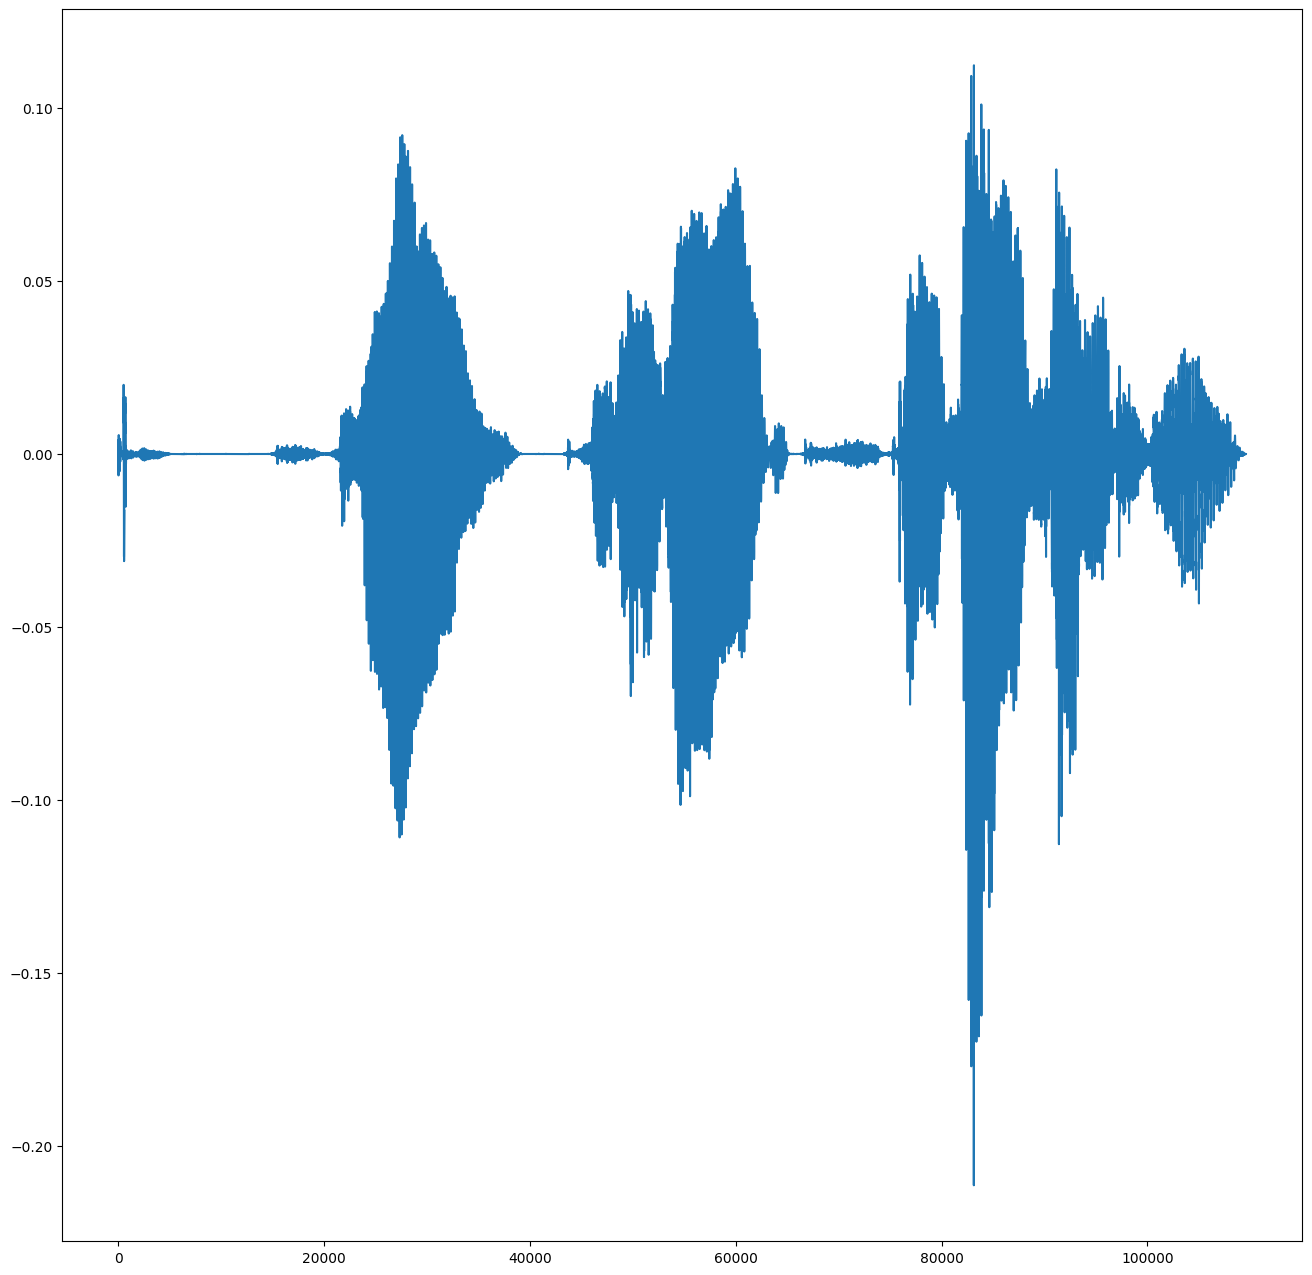

In [8]:
plot(waveform)

In [27]:
from model2 import Rec
import torch
model = Rec()
model.load_state_dict(torch.load('../models/speech_2.pt'))

ImportError: cannot import name 'load_example' from 'preprocces' (c:\fun\ForensicsChallenge2023_team6\audio_detection\speech_recognition_fromscratch\v2\preprocces.py)

In [21]:
mel_specgram[0].T.shape

torch.Size([429, 80])

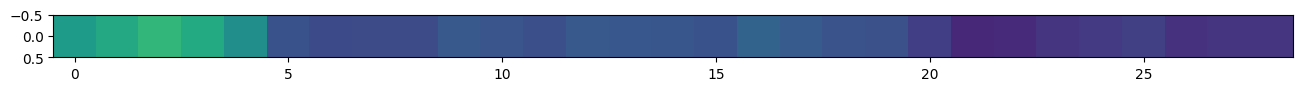

In [32]:
from model2 import load_example, CHARSET
from preprocces import to_text
#val = torch.tensor(load_example('../data/wavs/LJ037-0171.wav'))
model.eval()
val = mel_specgram[0].T
imshow(torch.log10(val).T)
mguess = model(val[:, None])
imshow(mguess.detach().numpy()[0])
pp = to_text(mguess[:, 0, :].argmax(dim=1).numpy())
print(pp)